# Rental Bike Sharing Service Prediction For BoomBikes

### Business Objecive: 
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

### Problem Statement:
Business wants to require to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

- The model should be built taking this 'cnt' as the target variable.

### Steps that will Follow 
1. Reading , Understanding and Visualising the data.
2. Preparing the data for modeling Training-Test split, rescalling etc.
3. Training the Model
4. Residual Analysis
5. Prediction & Evaluation on the Test set
6. Conclusion

### Step 1: Reading and Understanding the Data

Let us first import load the libs and read the bike rent dataset

In [697]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats



bike_df = pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Dataset characteristics

day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	


In [698]:
bike_df.shape 

(730, 16)

In [699]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [700]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- Dropping the redundant variables
1. dteday is not required as we have already useful variables like yr and month. 
2. instant is just an index variable so we dont need it.
3. If holiday is '1' then in working day we can not see 6 and 0 values, so we can remove holiday col 
4.  casual+registered=cnt, cnt is our target variabl. Hence,can't consider casual and registered columns as independent variables.
bike.drop(['dteday','instant', 'casual','registered'],axis=1,inplace=True)

In [701]:
bike_df.drop(columns={'dteday', 'instant', 'holiday', 'casual', 'registered'}, inplace=True)

In [702]:
# Converting numerical variables into categorical variables
bike_df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bike_df['weathersit'].replace({1:'Clear',2:'Misty Weather',3:'Light Weather',4:'Heavy Rain'}, inplace=True)
bike_df['weekday'].replace({0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat", 6:"Sun"},inplace=True)
bike_df['mnth'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8:'Aug', 9: 'Sep', 10:'Oct', 11:'Nov', 12:'Dec'},inplace=True)
bike_df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,Sun,0,Misty Weather,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,Mon,0,Misty Weather,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,Tue,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,Wed,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,Thu,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


- #### Visualising the data

- Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

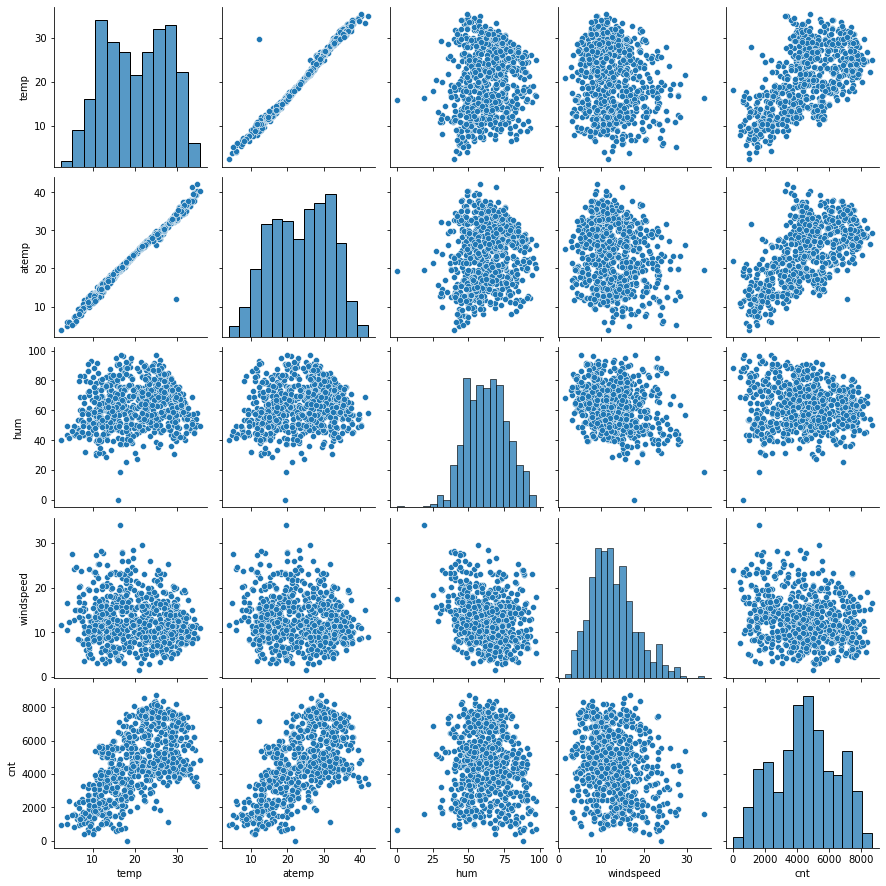

In [703]:
sns.pairplot(bike_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

###### Observation :
1. As per above pair plot we can see the relation among temp, atemp, hum, windspeed, cnt. Hence, we can gp for prediction using linear regression model.
2. Variables, temp and atemp showing positive correlation here. We have to check correlation to avoid muli-collinearity.

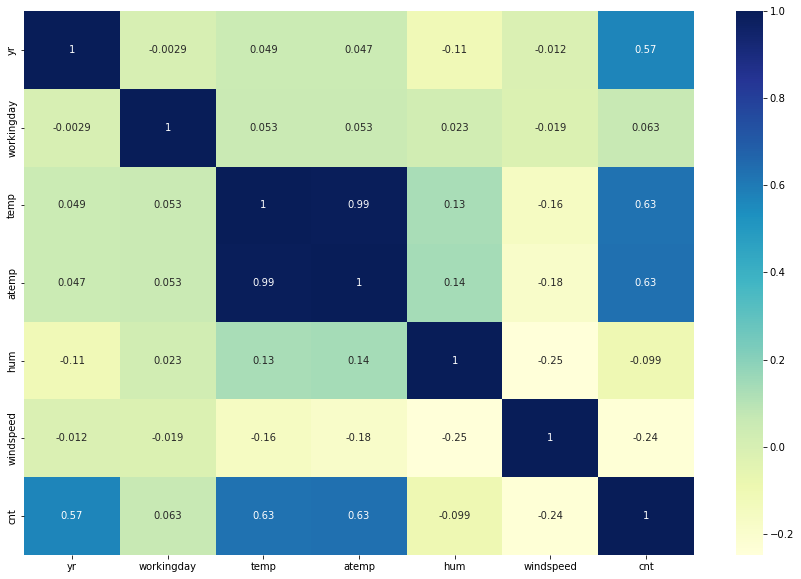

In [704]:
#Plotting heatmap to to check the correlation b/w temp and atemp
plt.figure(figsize=(15,10))
sns.heatmap(bike_df.corr(), annot=True, cmap="YlGnBu")
plt.show()


- We can see temp and atemp are highly corrleated so we have to drop a varible from temp and atemp. We can use VIF for identification of dropping variable

In [705]:
# selecting only numeric variable columns
num_vars = bike_df[['temp','atemp','hum','windspeed',"cnt"]]
X = sm.add_constant(num_vars)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

const        52.978017
temp         62.993716
atemp        63.935491
hum           1.178404
windspeed     1.187971
cnt           1.862057
dtype: float64

- ##### Since atemp is highe VIF value, so we can drop atemp.

In [706]:
# dropping atemp
bike_df.drop(columns={'atemp'}, inplace=True)

In [707]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   weekday     730 non-null    object 
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    object 
 6   temp        730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 57.2+ KB


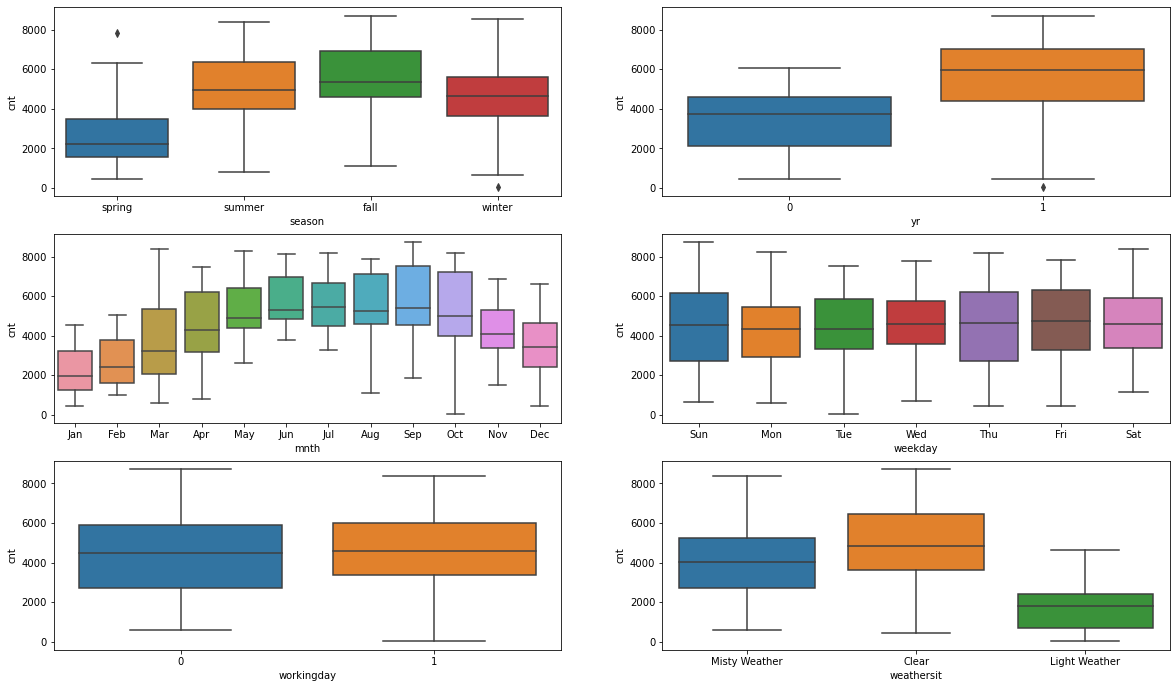

In [708]:
plt.figure(figsize=(20, 16))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(4,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(4,2,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(4,2,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.show()

##### Observation :
- We can see, Linear trends relation is showing among independent categorical variables and target variable cnt.

In [709]:
def bar_cat(feature):
    sns.barplot(feature,'cnt',data=bike_df)
    plt.title("Count vs "+str(feature))
    plt.show()

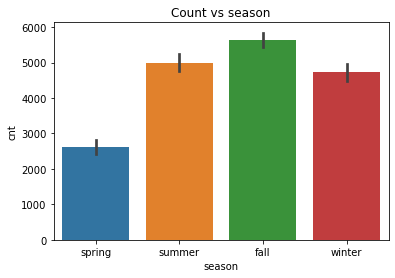

In [710]:
# Season Vs Cnt
bar_cat('season')

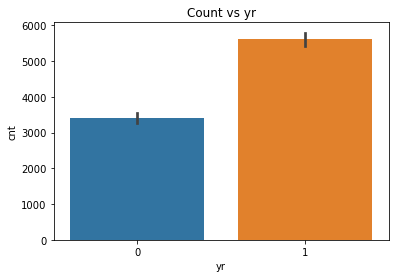

In [711]:
# Yr vs Cnt
bar_cat('yr')

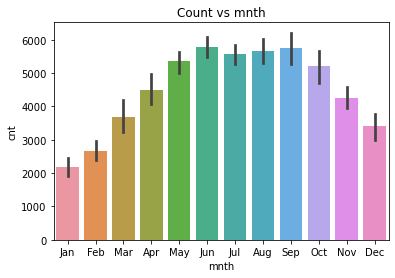

In [712]:
# Yr vs Cnt
bar_cat('mnth')

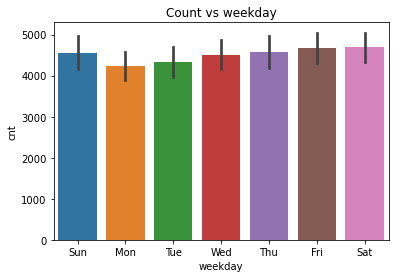

In [713]:
# Yr vs Cnt
bar_cat('weekday')

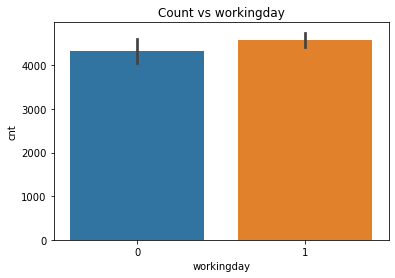

In [714]:
# Yr vs Cnt
bar_cat('workingday')

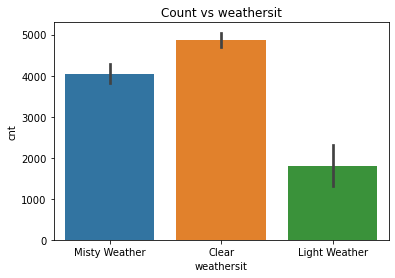

In [715]:
# Yr vs Cnt
bar_cat('weathersit')

###### Observation: 
We can see the variation among the independent categorical variables with respective of target variable cnt

### Step 2: Data Preparation

-  Encoded Categorical Variable's Value

- season, mnth, weekday and weathersit have categorical values. We will convert into Encoded format.

For this, we will use something called dummy variables.


In [716]:
bike_df = pd.get_dummies(bike_df, columns = ['season', 'mnth', 'weekday', 'weathersit'])
bike_df.head()

,yr,workingday,temp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter,...,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light Weather,weathersit_Misty Weather
0,0,0,14.110847,80.5833,10.749882,985,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,1,8.200000,59.0435,10.739832,1562,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,0,1,9.305237,43.6957,12.522300,1600,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [717]:
# we can identify season_fall via other season encoded values,so we can drop this to reduce the correlation b/w dummy values
bike_df.drop(columns={'season_fall'}, inplace=True)
bike_df.head()

,yr,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Apr,...,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light Weather,weathersit_Misty Weather
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


### Step 3: Train the Model
- Splitting the Data into Training and Testing Sets 

As you know, the first basic step for regression is performing a train-test split.


In [718]:
# We specify this so that the train and test data set always have the same rows, respectively
np .random.seed(0)
df_train, df_test = train_test_split(bike_df, train_size=0.7, test_size=0.3, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 31)
(219, 31)


In [719]:
df_train.head()

,yr,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Apr,...,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light Weather,weathersit_Misty Weather
653,1,1,19.201653,55.8333,12.208807,7534,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
576,1,1,29.246653,70.4167,11.083475,7216,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
426,1,0,16.980847,62.1250,10.792293,4066,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,10.489153,48.3333,23.500518,1796,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,15.443347,48.9583,8.708325,4220,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1


- #### Rescaling the Features
- important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)
- This time, we will use MinMax scaling.

In [720]:
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = [ 'temp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Apr,...,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light Weather,weathersit_Misty Weather
653,1,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
576,1,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
426,1,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0.395666,0.504508,0.188475,0.482973,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1


In [721]:
df_train.describe()

,yr,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Apr,...,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light Weather,weathersit_Misty Weather
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.078431,...,0.133333,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.627451,0.029412,0.343137
std,0.500429,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.269113,...,0.340268,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.483958,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [722]:
#check the correlation matrix
corr_matrix = df_train.corr()
corr_matrix['cnt'].sort_values(ascending=False)

cnt                         1.000000
temp                        0.643517
yr                          0.591508
weathersit_Clear            0.251548
mnth_Aug                    0.227229
mnth_Sep                    0.201327
mnth_Jun                    0.187821
mnth_Jul                    0.157812
season_summer               0.134343
mnth_May                    0.113027
workingday                  0.092320
mnth_Oct                    0.065692
season_winter               0.032636
weekday_Wed                 0.031883
weekday_Thu                 0.025216
weekday_Sat                 0.024581
mnth_Apr                    0.022998
weekday_Fri                 0.009710
weekday_Tue                -0.009552
weekday_Sun                -0.016215
mnth_Nov                   -0.048130
hum                        -0.059993
weekday_Mon                -0.063385
mnth_Mar                   -0.137537
mnth_Dec                   -0.143598
weathersit_Misty Weather   -0.175530
weathersit_Light Weather   -0.226598
w

- #### Dividing into X and Y sets for the model building


In [723]:
# Extracting target variable 'cnt' as y_train
# Rest we will use as independent variables as X_train
y_train = df_train.pop('cnt')
X_train = df_train


- #### Building a linear model


In [724]:
# add constant
X_train_lm = sm.add_constant(X_train)
#check first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()


In [725]:
lr.params.sort_values(ascending=False)

temp                        0.450562
yr                          0.232116
weathersit_Clear            0.138199
season_winter               0.105847
mnth_Sep                    0.097220
const                       0.096087
weekday_Sun                 0.091027
workingday                  0.086925
weathersit_Misty Weather    0.077132
mnth_May                    0.040100
season_summer               0.038725
weekday_Mon                 0.036492
mnth_Aug                    0.030564
mnth_Oct                    0.023694
mnth_Mar                    0.017205
mnth_Apr                    0.016160
mnth_Jun                    0.013188
weekday_Sat                 0.004598
weekday_Thu                -0.000790
weekday_Fri                -0.004639
weekday_Wed                -0.014292
mnth_Feb                   -0.016122
weekday_Tue                -0.016309
mnth_Jul                   -0.024190
mnth_Nov                   -0.025691
mnth_Dec                   -0.029426
mnth_Jan                   -0.046616
s

In [726]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          8.74e-182
Time:                        11:17:23   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

- Note: Some variables are not significant (p <= 0.05), we have to drop that variables that are not significant for linear regression model

In [728]:
# dropping weekday_4
X_train.drop(columns={'weekday_Thu'}, inplace=True)


In [730]:
# add constant
X_train_lm = sm.add_constant(X_train)

#check first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()


In [731]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          8.74e-182
Time:                        11:18:51   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0955      0.035      2.714      0.007       0.026       0.165
yr                           0.2321      0.008     28.820      0.000       0.216       0.248
workingday                   0.0869      0.027      3.269      0.001       0.035       0.139
temp                         0.4506      0.046      9.734      0.000       0.360       0.542
hum                         -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed                   -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring               -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer                0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter                0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Apr                     0.0161      0.021      0.759      0.448      -0.026       0.058
mnth_Aug                     0.0305      0.023      1.312      0.190      -0.015       0.076
mnth_Dec                    -0.0295      0.020     -1.462      0.144      -0.069       0.010
mnth_Feb                    -0.0162      0.024     -0.685      0.494      -0.063       0.030
mnth_Jan                    -0.0467      0.024     -1.924      0.055      -0.094       0.001
mnth_Jul                    -0.0242      0.025     -0.955      0.340      -0.074       0.026
mnth_Jun                     0.0131      0.021      0.613      0.540      -0.029       0.055
mnth_Mar                     0.0172      0.017      0.986      0.325      -0.017       0.051
mnth_May                     0.0401      0.022      1.797      0.073      -0.004       0.084
mnth_Nov                    -0.0257      0.023     -1.125      0.261      -0.071       0.019
mnth_Oct                     0.0236      0.022      1.059      0.290      -0.020       0.068
mnth_Sep                     0.0972      0.019      5.077      0.000       0.060       0.135
weekday_Fri                 -0.0038      0.015     -0.263      0.793      -0.033       0.025
weekday_Mon                  0.0373      0.030      1.235      0.218      -0.022       0.097
weekday_Sat                  0.0054      0.015      0.362      0.718      -0.024       0.035
weekday_Sun                  0.0918      0.030      3.047      0.002       0.033       0.151
weekday_Tue                 -0.0155      0.015     -1.064      0.288      -0.044       0.013
weekday_Wed                 -0.0135      0.015     -0.917      0.359      -0.042       0.015
weathersit_Clear             0.1380      0.013     10.846      0.000       0.113       0.163
weathersit_Light Weather    -0.1194      0.023     -5.239      0.000      -0.164      -0.075
weathersit_Misty Weather     0.0769      0.014      5.354      0.000       0.049       0.105
==============

- ##### Dropping the Variable and Updating the Model


In [732]:
X_train.drop(columns={'weekday_Fri'}, inplace=True)

In [733]:

# add constant
X_train_lm = sm.add_constant(X_train)

#check first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          8.61e-183
Time:                        11:19:19   Log-Likelihood:                 527.92
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     483   BIC:                            -887.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0939      0.035      2.713      0.007       0.026       0.162
yr                           0.2321      0.008     28.850      0.000       0.216       0.248
workingday                   0.0872      0.027      3.287      0.001       0.035       0.139
temp                         0.4504      0.046      9.741      0.000       0.360       0.541
hum                         -0.1510      0.038     -3.930      0.000      -0.226      -0.076
windspeed                   -0.1865      0.026     -7.265      0.000      -0.237      -0.136
season_spring               -0.0479      0.030     -1.600      0.110      -0.107       0.011
season_summer                0.0389      0.026      1.486      0.138      -0.013       0.090
season_winter                0.1061      0.028      3.810      0.000       0.051       0.161
mnth_Apr                     0.0161      0.021      0.757      0.450      -0.026       0.058
mnth_Aug                     0.0306      0.023      1.315      0.189      -0.015       0.076
mnth_Dec                    -0.0299      0.020     -1.489      0.137      -0.069       0.010
mnth_Feb                    -0.0163      0.024     -0.692      0.489      -0.063       0.030
mnth_Jan                    -0.0469      0.024     -1.939      0.053      -0.095       0.001
mnth_Jul                    -0.0242      0.025     -0.954      0.340      -0.074       0.026
mnth_Jun                     0.0132      0.021      0.617      0.538      -0.029       0.055
mnth_Mar                     0.0169      0.017      0.972      0.332      -0.017       0.051
mnth_May                     0.0400      0.022      1.797      0.073      -0.004       0.084
mnth_Nov                    -0.0261      0.023     -1.143      0.254      -0.071       0.019
mnth_Oct                     0.0235      0.022      1.052      0.293      -0.020       0.067
mnth_Sep                     0.0971      0.019      5.080      0.000       0.060       0.135
weekday_Mon                  0.0393      0.029      1.349      0.178      -0.018       0.097
weekday_Sat                  0.0071      0.013      0.537      0.591      -0.019       0.033
weekday_Sun                  0.0939      0.029      3.230      0.001       0.037       0.151
weekday_Tue                 -0.0137      0.013     -1.065      0.287      -0.039       0.012
weekday_Wed                 -0.0118      0.013     -0.896      0.371      -0.038       0.014
weathersit_Clear             0.1374      0.013     10.988      0.000       0.113       0.162
weathersit_Light Weather    -0.1199      0.023     -5.282      0.000      -0.165      -0.075
weathersit_Misty Weather     0.0764      0.014      5.381      0.000       0.048       0.104
==============================================================================
Omnibus:                    

- ##### Dropping the Variable and Updating the Model

In [734]:
X_train.drop(columns={'weekday_Sat'}, inplace=True)

In [735]:
# add constant
X_train_lm = sm.add_constant(X_train)

#check first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          9.26e-184
Time:                        11:19:45   Log-Likelihood:                 527.77
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     484   BIC:                            -893.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0959      0.034      2.788      0.006       0.028       0.163
yr                           0.2321      0.008     28.867      0.000       0.216       0.248
workingday                   0.0870      0.027      3.283      0.001       0.035       0.139
temp                         0.4500      0.046      9.741      0.000       0.359       0.541
hum                         -0.1517      0.038     -3.953      0.000      -0.227      -0.076
windspeed                   -0.1865      0.026     -7.271      0.000      -0.237      -0.136
season_spring               -0.0479      0.030     -1.603      0.110      -0.107       0.011
season_summer                0.0387      0.026      1.480      0.140      -0.013       0.090
season_winter                0.1062      0.028      3.817      0.000       0.052       0.161
mnth_Apr                     0.0164      0.021      0.774      0.439      -0.025       0.058
mnth_Aug                     0.0309      0.023      1.332      0.183      -0.015       0.077
mnth_Dec                    -0.0298      0.020     -1.487      0.138      -0.069       0.010
mnth_Feb                    -0.0161      0.024     -0.682      0.495      -0.062       0.030
mnth_Jan                    -0.0470      0.024     -1.941      0.053      -0.094       0.001
mnth_Jul                    -0.0235      0.025     -0.930      0.353      -0.073       0.026
mnth_Jun                     0.0134      0.021      0.624      0.533      -0.029       0.055
mnth_Mar                     0.0169      0.017      0.974      0.331      -0.017       0.051
mnth_May                     0.0404      0.022      1.814      0.070      -0.003       0.084
mnth_Nov                    -0.0265      0.023     -1.163      0.245      -0.071       0.018
mnth_Oct                     0.0237      0.022      1.065      0.288      -0.020       0.067
mnth_Sep                     0.0971      0.019      5.084      0.000       0.060       0.135
weekday_Mon                  0.0369      0.029      1.283      0.200      -0.020       0.094
weekday_Sun                  0.0915      0.029      3.187      0.002       0.035       0.148
weekday_Tue                 -0.0159      0.012     -1.305      0.193      -0.040       0.008
weekday_Wed                 -0.0140      0.012     -1.122      0.262      -0.038       0.011
weathersit_Clear             0.1382      0.012     11.148      0.000       0.114       0.163
weathersit_Light Weather    -0.1200      0.023     -5.291      0.000      -0.165      -0.075
weathersit_Misty Weather     0.0776      0.014      5.552      0.000       0.050       0.105
==============================================================================
Omnibus:                       84.536   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Ja

- ##### Dropping the Variable and Updating the Model

In [736]:
X_train.drop(columns={'mnth_Jun'}, inplace=True)


In [737]:
# add constant
X_train_lm = sm.add_constant(X_train)

#check first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          9.26e-184
Time:                        11:20:04   Log-Likelihood:                 527.77
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     484   BIC:                            -893.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1059      0.042      2.517      0.012       0.023       0.189
yr                           0.2321      0.008     28.867      0.000       0.216       0.248
workingday                   0.0870      0.027      3.283      0.001       0.035       0.139
temp                         0.4500      0.046      9.741      0.000       0.359       0.541
hum                         -0.1517      0.038     -3.953      0.000      -0.227      -0.076
windspeed                   -0.1865      0.026     -7.271      0.000      -0.237      -0.136
season_spring               -0.0479      0.030     -1.603      0.110      -0.107       0.011
season_summer                0.0387      0.026      1.480      0.140      -0.013       0.090
season_winter                0.1062      0.028      3.817      0.000       0.052       0.161
mnth_Apr                     0.0031      0.025      0.122      0.903      -0.046       0.052
mnth_Aug                     0.0176      0.025      0.693      0.489      -0.032       0.067
mnth_Dec                    -0.0432      0.036     -1.194      0.233      -0.114       0.028
mnth_Feb                    -0.0294      0.037     -0.786      0.432      -0.103       0.044
mnth_Jan                    -0.0603      0.039     -1.552      0.121      -0.137       0.016
mnth_Jul                    -0.0369      0.026     -1.421      0.156      -0.088       0.014
mnth_Mar                     0.0035      0.029      0.122      0.903      -0.053       0.060
mnth_May                     0.0270      0.023      1.192      0.234      -0.018       0.071
mnth_Nov                    -0.0399      0.038     -1.060      0.290      -0.114       0.034
mnth_Oct                     0.0104      0.035      0.294      0.769      -0.059       0.080
mnth_Sep                     0.0838      0.026      3.200      0.001       0.032       0.135
weekday_Mon                  0.0369      0.029      1.283      0.200      -0.020       0.094
weekday_Sun                  0.0915      0.029      3.187      0.002       0.035       0.148
weekday_Tue                 -0.0159      0.012     -1.305      0.193      -0.040       0.008
weekday_Wed                 -0.0140      0.012     -1.122      0.262      -0.038       0.011
weathersit_Clear             0.1416      0.015      9.569      0.000       0.113       0.171
weathersit_Light Weather    -0.1167      0.024     -4.836      0.000      -0.164      -0.069
weathersit_Misty Weather     0.0810      0.016      5.034      0.000       0.049       0.113
==============================================================================
Omnibus:                       84.536   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.621
Skew:                          -0.803   Prob(JB):       

In [738]:
X_train.drop(columns={'mnth_Apr'}, inplace=True)

In [739]:
# add constant
X_train_lm = sm.add_constant(X_train)

#check first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.4
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          8.51e-185
Time:                        11:20:21   Log-Likelihood:                 527.76
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     485   BIC:                            -899.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1075      0.040      2.696      0.007       0.029       0.186
yr                           0.2322      0.008     29.058      0.000       0.216       0.248
workingday                   0.0869      0.026      3.284      0.001       0.035       0.139
temp                         0.4475      0.041     10.834      0.000       0.366       0.529
hum                         -0.1513      0.038     -3.958      0.000      -0.226      -0.076
windspeed                   -0.1862      0.025     -7.306      0.000      -0.236      -0.136
season_spring               -0.0473      0.029     -1.610      0.108      -0.105       0.010
season_summer                0.0397      0.025      1.593      0.112      -0.009       0.089
season_winter                0.1066      0.028      3.859      0.000       0.052       0.161
mnth_Aug                     0.0172      0.025      0.684      0.494      -0.032       0.067
mnth_Dec                    -0.0452      0.032     -1.399      0.162      -0.109       0.018
mnth_Feb                    -0.0318      0.032     -0.985      0.325      -0.095       0.032
mnth_Jan                    -0.0628      0.033     -1.898      0.058      -0.128       0.002
mnth_Jul                    -0.0371      0.026     -1.432      0.153      -0.088       0.014
mnth_Mar                     0.0014      0.023      0.061      0.951      -0.044       0.047
mnth_May                     0.0253      0.018      1.421      0.156      -0.010       0.060
mnth_Nov                    -0.0416      0.035     -1.202      0.230      -0.110       0.026
mnth_Oct                     0.0089      0.033      0.269      0.788      -0.056       0.074
mnth_Sep                     0.0831      0.025      3.258      0.001       0.033       0.133
weekday_Mon                  0.0367      0.029      1.280      0.201      -0.020       0.093
weekday_Sun                  0.0913      0.029      3.190      0.002       0.035       0.147
weekday_Tue                 -0.0160      0.012     -1.309      0.191      -0.040       0.008
weekday_Wed                 -0.0139      0.012     -1.119      0.264      -0.038       0.011
weathersit_Clear             0.1422      0.014     10.136      0.000       0.115       0.170
weathersit_Light Weather    -0.1162      0.024     -4.897      0.000      -0.163      -0.070
weathersit_Misty Weather     0.0815      0.015      5.269      0.000       0.051       0.112
==============================================================================
Omnibus:                       84.839   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.502
Skew:                          -0.804   Prob(JB):                     1.62e-52
Kurtosis:                       5.939   Cond. No.                     

In [740]:
X_train.drop(columns={'mnth_Mar'}, inplace=True)


In [741]:
# add constant
X_train_lm = sm.add_constant(X_train)

#check first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          7.61e-186
Time:                        11:20:39   Log-Likelihood:                 527.76
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     486   BIC:                            -905.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1081      0.038      2.810      0.005       0.033       0.184
yr                           0.2322      0.008     29.102      0.000       0.217       0.248
workingday                   0.0869      0.026      3.288      0.001       0.035       0.139
temp                         0.4466      0.038     11.602      0.000       0.371       0.522
hum                         -0.1511      0.038     -3.980      0.000      -0.226      -0.076
windspeed                   -0.1862      0.025     -7.316      0.000      -0.236      -0.136
season_spring               -0.0465      0.027     -1.734      0.084      -0.099       0.006
season_summer                0.0395      0.025      1.597      0.111      -0.009       0.088
season_winter                0.1070      0.027      3.988      0.000       0.054       0.160
mnth_Aug                     0.0170      0.025      0.685      0.494      -0.032       0.066
mnth_Dec                    -0.0464      0.026     -1.799      0.073      -0.097       0.004
mnth_Feb                    -0.0332      0.022     -1.501      0.134      -0.077       0.010
mnth_Jan                    -0.0643      0.022     -2.927      0.004      -0.107      -0.021
mnth_Jul                    -0.0373      0.026     -1.453      0.147      -0.088       0.013
mnth_May                     0.0250      0.017      1.447      0.149      -0.009       0.059
mnth_Nov                    -0.0427      0.030     -1.409      0.160      -0.102       0.017
mnth_Oct                     0.0080      0.030      0.271      0.787      -0.050       0.066
mnth_Sep                     0.0826      0.024      3.399      0.001       0.035       0.130
weekday_Mon                  0.0367      0.029      1.280      0.201      -0.020       0.093
weekday_Sun                  0.0912      0.029      3.193      0.002       0.035       0.147
weekday_Tue                 -0.0160      0.012     -1.311      0.190      -0.040       0.008
weekday_Wed                 -0.0139      0.012     -1.120      0.263      -0.038       0.010
weathersit_Clear             0.1424      0.014     10.499      0.000       0.116       0.169
weathersit_Light Weather    -0.1159      0.023     -4.947      0.000      -0.162      -0.070
weathersit_Misty Weather     0.0817      0.015      5.408      0.000       0.052       0.111
==============================================================================
Omnibus:                       84.853   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.077
Skew:                          -0.803   Prob(JB):                     1.22e-52
Kurtosis:                       5.944   Cond. No.                     6.12e+15
==============================================================================

Note

In [742]:
X_train.drop(columns={'mnth_Oct'}, inplace=True)


In [743]:
# add constant
X_train_lm = sm.add_constant(X_train)

#check first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     128.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          6.87e-187
Time:                        11:20:57   Log-Likelihood:                 527.72
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     487   BIC:                            -912.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1101      0.038      2.913      0.004       0.036       0.184
yr                           0.2321      0.008     29.130      0.000       0.216       0.248
workingday                   0.0862      0.026      3.280      0.001       0.035       0.138
temp                         0.4457      0.038     11.633      0.000       0.370       0.521
hum                         -0.1498      0.038     -3.980      0.000      -0.224      -0.076
windspeed                   -0.1858      0.025     -7.320      0.000      -0.236      -0.136
season_spring               -0.0476      0.027     -1.791      0.074      -0.100       0.005
season_summer                0.0372      0.023      1.602      0.110      -0.008       0.083
season_winter                0.1109      0.023      4.910      0.000       0.067       0.155
mnth_Aug                     0.0149      0.024      0.633      0.527      -0.031       0.061
mnth_Dec                    -0.0513      0.018     -2.835      0.005      -0.087      -0.016
mnth_Feb                    -0.0347      0.021     -1.625      0.105      -0.077       0.007
mnth_Jan                    -0.0659      0.021     -3.112      0.002      -0.107      -0.024
mnth_Jul                    -0.0393      0.025     -1.600      0.110      -0.088       0.009
mnth_May                     0.0250      0.017      1.448      0.148      -0.009       0.059
mnth_Nov                    -0.0491      0.019     -2.619      0.009      -0.086      -0.012
mnth_Sep                     0.0795      0.021      3.719      0.000       0.037       0.121
weekday_Mon                  0.0361      0.029      1.264      0.207      -0.020       0.092
weekday_Sun                  0.0906      0.028      3.184      0.002       0.035       0.146
weekday_Tue                 -0.0161      0.012     -1.319      0.188      -0.040       0.008
weekday_Wed                 -0.0139      0.012     -1.122      0.263      -0.038       0.010
weathersit_Clear             0.1430      0.013     10.714      0.000       0.117       0.169
weathersit_Light Weather    -0.1152      0.023     -4.957      0.000      -0.161      -0.070
weathersit_Misty Weather     0.0822      0.015      5.492      0.000       0.053       0.112
==============================================================================
Omnibus:                       84.029   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.250
Skew:                          -0.798   Prob(JB):                     8.25e-52
Kurtosis:                       5.920   Cond. No.                     1.19e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

In [744]:
X_train.drop(columns={'mnth_Aug'}, inplace=True)


In [745]:
# add constant
X_train_lm = sm.add_constant(X_train)

#check first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     134.9
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          7.12e-188
Time:                        11:21:16   Log-Likelihood:                 527.51
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     488   BIC:                            -917.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1159      0.037      3.168      0.002       0.044       0.188
yr                           0.2323      0.008     29.179      0.000       0.217       0.248
workingday                   0.0865      0.026      3.293      0.001       0.035       0.138
temp                         0.4474      0.038     11.717      0.000       0.372       0.522
hum                         -0.1487      0.038     -3.958      0.000      -0.223      -0.075
windspeed                   -0.1859      0.025     -7.332      0.000      -0.236      -0.136
season_spring               -0.0571      0.022     -2.613      0.009      -0.100      -0.014
season_summer                0.0271      0.017      1.606      0.109      -0.006       0.060
season_winter                0.1021      0.018      5.756      0.000       0.067       0.137
mnth_Dec                    -0.0520      0.018     -2.882      0.004      -0.088      -0.017
mnth_Feb                    -0.0347      0.021     -1.626      0.105      -0.077       0.007
mnth_Jan                    -0.0659      0.021     -3.113      0.002      -0.107      -0.024
mnth_Jul                    -0.0499      0.018     -2.782      0.006      -0.085      -0.015
mnth_May                     0.0247      0.017      1.430      0.153      -0.009       0.059
mnth_Nov                    -0.0500      0.019     -2.679      0.008      -0.087      -0.013
mnth_Sep                     0.0710      0.017      4.276      0.000       0.038       0.104
weekday_Mon                  0.0363      0.029      1.271      0.204      -0.020       0.092
weekday_Sun                  0.0912      0.028      3.210      0.001       0.035       0.147
weekday_Tue                 -0.0161      0.012     -1.327      0.185      -0.040       0.008
weekday_Wed                 -0.0138      0.012     -1.110      0.267      -0.038       0.011
weathersit_Clear             0.1451      0.013     11.251      0.000       0.120       0.170
weathersit_Light Weather    -0.1138      0.023     -4.923      0.000      -0.159      -0.068
weathersit_Misty Weather     0.0846      0.014      5.843      0.000       0.056       0.113
==============================================================================
Omnibus:                       85.200   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.415
Skew:                          -0.809   Prob(JB):                     1.69e-52
Kurtosis:                       5.933   Cond. No.                     9.46e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.94e-29. This might indicate that there are
strong multicol

In [746]:
X_train.drop(columns={'weekday_Wed'}, inplace=True)

In [747]:
# add constant
X_train_lm = sm.add_constant(X_train)

#check first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     141.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.09e-188
Time:                        11:21:32   Log-Likelihood:                 526.86
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     489   BIC:                            -922.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1153      0.037      3.149      0.002       0.043       0.187
yr                           0.2323      0.008     29.168      0.000       0.217       0.248
workingday                   0.0856      0.026      3.262      0.001       0.034       0.137
temp                         0.4480      0.038     11.729      0.000       0.373       0.523
hum                         -0.1502      0.038     -4.000      0.000      -0.224      -0.076
windspeed                   -0.1865      0.025     -7.353      0.000      -0.236      -0.137
season_spring               -0.0568      0.022     -2.600      0.010      -0.100      -0.014
season_summer                0.0271      0.017      1.600      0.110      -0.006       0.060
season_winter                0.1015      0.018      5.723      0.000       0.067       0.136
mnth_Dec                    -0.0510      0.018     -2.830      0.005      -0.086      -0.016
mnth_Feb                    -0.0356      0.021     -1.671      0.095      -0.078       0.006
mnth_Jan                    -0.0657      0.021     -3.103      0.002      -0.107      -0.024
mnth_Jul                    -0.0509      0.018     -2.839      0.005      -0.086      -0.016
mnth_May                     0.0243      0.017      1.407      0.160      -0.010       0.058
mnth_Nov                    -0.0497      0.019     -2.658      0.008      -0.086      -0.013
mnth_Sep                     0.0712      0.017      4.291      0.000       0.039       0.104
weekday_Mon                  0.0389      0.028      1.366      0.172      -0.017       0.095
weekday_Sun                  0.0936      0.028      3.303      0.001       0.038       0.149
weekday_Tue                 -0.0129      0.012     -1.093      0.275      -0.036       0.010
weathersit_Clear             0.1442      0.013     11.199      0.000       0.119       0.169
weathersit_Light Weather    -0.1130      0.023     -4.888      0.000      -0.158      -0.068
weathersit_Misty Weather     0.0840      0.014      5.805      0.000       0.056       0.112
==============================================================================
Omnibus:                       85.273   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.213
Skew:                          -0.802   Prob(JB):                     9.33e-54
Kurtosis:                       5.987   Cond. No.                     1.83e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.16e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [748]:
X_train.drop(columns={'weekday_Tue'}, inplace=True)


In [749]:
# add constant
X_train_lm = sm.add_constant(X_train)

#check first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.59e-189
Time:                        11:21:49   Log-Likelihood:                 526.24
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     490   BIC:                            -927.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1080      0.036      2.999      0.003       0.037       0.179
yr                           0.2317      0.008     29.150      0.000       0.216       0.247
workingday                   0.0933      0.025      3.685      0.000       0.044       0.143
temp                         0.4500      0.038     11.796      0.000       0.375       0.525
hum                         -0.1521      0.038     -4.055      0.000      -0.226      -0.078
windspeed                   -0.1868      0.025     -7.365      0.000      -0.237      -0.137
season_spring               -0.0560      0.022     -2.563      0.011      -0.099      -0.013
season_summer                0.0269      0.017      1.593      0.112      -0.006       0.060
season_winter                0.1012      0.018      5.705      0.000       0.066       0.136
mnth_Dec                    -0.0506      0.018     -2.807      0.005      -0.086      -0.015
mnth_Feb                    -0.0355      0.021     -1.661      0.097      -0.077       0.006
mnth_Jan                    -0.0658      0.021     -3.110      0.002      -0.107      -0.024
mnth_Jul                    -0.0512      0.018     -2.858      0.004      -0.086      -0.016
mnth_May                     0.0250      0.017      1.449      0.148      -0.009       0.059
mnth_Nov                    -0.0483      0.019     -2.592      0.010      -0.085      -0.012
mnth_Sep                     0.0718      0.017      4.324      0.000       0.039       0.104
weekday_Mon                  0.0491      0.027      1.827      0.068      -0.004       0.102
weekday_Sun                  0.1038      0.027      3.876      0.000       0.051       0.156
weathersit_Clear             0.1414      0.013     11.202      0.000       0.117       0.166
weathersit_Light Weather    -0.1150      0.023     -4.989      0.000      -0.160      -0.070
weathersit_Misty Weather     0.0815      0.014      5.702      0.000       0.053       0.110
==============================================================================
Omnibus:                       84.215   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.321
Skew:                          -0.792   Prob(JB):                     3.96e-53
Kurtosis:                       5.974   Cond. No.                     1.25e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.1e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [750]:
X_train.drop(columns={'mnth_May'}, inplace=True)


In [751]:
# add constant
X_train_lm = sm.add_constant(X_train)

#check first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          3.55e-190
Time:                        11:22:11   Log-Likelihood:                 525.15
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0984      0.035      2.778      0.006       0.029       0.168
yr                           0.2311      0.008     29.082      0.000       0.215       0.247
workingday                   0.0943      0.025      3.722      0.000       0.045       0.144
temp                         0.4598      0.038     12.233      0.000       0.386       0.534
hum                         -0.1456      0.037     -3.904      0.000      -0.219      -0.072
windspeed                   -0.1887      0.025     -7.440      0.000      -0.239      -0.139
season_spring               -0.0518      0.022     -2.390      0.017      -0.094      -0.009
season_summer                0.0377      0.015      2.483      0.013       0.008       0.068
season_winter                0.1035      0.018      5.852      0.000       0.069       0.138
mnth_Dec                    -0.0491      0.018     -2.727      0.007      -0.085      -0.014
mnth_Feb                    -0.0339      0.021     -1.591      0.112      -0.076       0.008
mnth_Jan                    -0.0640      0.021     -3.025      0.003      -0.106      -0.022
mnth_Jul                    -0.0517      0.018     -2.883      0.004      -0.087      -0.016
mnth_Nov                    -0.0465      0.019     -2.499      0.013      -0.083      -0.010
mnth_Sep                     0.0718      0.017      4.319      0.000       0.039       0.104
weekday_Mon                  0.0499      0.027      1.857      0.064      -0.003       0.103
weekday_Sun                  0.1042      0.027      3.886      0.000       0.051       0.157
weathersit_Clear             0.1389      0.013     11.095      0.000       0.114       0.164
weathersit_Light Weather    -0.1194      0.023     -5.221      0.000      -0.164      -0.074
weathersit_Misty Weather     0.0789      0.014      5.558      0.000       0.051       0.107
==============================================================================
Omnibus:                       81.478   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.245
Skew:                          -0.787   Prob(JB):                     2.46e-48
Kurtosis:                       5.800   Cond. No.                     1.97e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.39e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [752]:
X_train.drop(columns={'mnth_Feb'}, inplace=True)


In [753]:
# add constant
X_train_lm = sm.add_constant(X_train)

#check first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          9.55e-191
Time:                        11:22:26   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0887      0.035      2.538      0.011       0.020       0.157
yr                           0.2308      0.008     29.005      0.000       0.215       0.246
workingday                   0.0966      0.025      3.812      0.000       0.047       0.146
temp                         0.4750      0.036     13.038      0.000       0.403       0.547
hum                         -0.1474      0.037     -3.949      0.000      -0.221      -0.074
windspeed                   -0.1876      0.025     -7.388      0.000      -0.237      -0.138
season_spring               -0.0611      0.021     -2.925      0.004      -0.102      -0.020
season_summer                0.0409      0.015      2.708      0.007       0.011       0.071
season_winter                0.1052      0.018      5.949      0.000       0.070       0.140
mnth_Dec                    -0.0405      0.017     -2.351      0.019      -0.074      -0.007
mnth_Jan                    -0.0458      0.018     -2.570      0.010      -0.081      -0.011
mnth_Jul                    -0.0526      0.018     -2.932      0.004      -0.088      -0.017
mnth_Nov                    -0.0420      0.018     -2.277      0.023      -0.078      -0.006
mnth_Sep                     0.0732      0.017      4.404      0.000       0.041       0.106
weekday_Mon                  0.0520      0.027      1.933      0.054      -0.001       0.105
weekday_Sun                  0.1070      0.027      3.997      0.000       0.054       0.160
weathersit_Clear             0.1352      0.012     10.975      0.000       0.111       0.159
weathersit_Light Weather    -0.1219      0.023     -5.334      0.000      -0.167      -0.077
weathersit_Misty Weather     0.0754      0.014      5.368      0.000       0.048       0.103
==============================================================================
Omnibus:                       76.965   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.539
Skew:                          -0.747   Prob(JB):                     2.33e-45
Kurtosis:                       5.727   Cond. No.                     6.00e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.76e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [754]:
X_train.drop(columns={'weekday_Mon'}, inplace=True)


In [755]:
# add constant
X_train_lm = sm.add_constant(X_train)

#check first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          4.53e-191
Time:                        11:23:03   Log-Likelihood:                 521.91
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1229      0.030      4.069      0.000       0.064       0.182
yr                           0.2310      0.008     28.956      0.000       0.215       0.247
workingday                   0.0522      0.011      4.847      0.000       0.031       0.073
temp                         0.4729      0.037     12.953      0.000       0.401       0.545
hum                         -0.1459      0.037     -3.899      0.000      -0.219      -0.072
windspeed                   -0.1880      0.025     -7.384      0.000      -0.238      -0.138
season_spring               -0.0628      0.021     -2.999      0.003      -0.104      -0.022
season_summer                0.0406      0.015      2.683      0.008       0.011       0.070
season_winter                0.1052      0.018      5.935      0.000       0.070       0.140
mnth_Dec                    -0.0415      0.017     -2.405      0.017      -0.075      -0.008
mnth_Jan                    -0.0468      0.018     -2.617      0.009      -0.082      -0.012
mnth_Jul                    -0.0516      0.018     -2.870      0.004      -0.087      -0.016
mnth_Nov                    -0.0462      0.018     -2.517      0.012      -0.082      -0.010
mnth_Sep                     0.0708      0.017      4.263      0.000       0.038       0.103
weekday_Sun                  0.0627      0.014      4.513      0.000       0.035       0.090
weathersit_Clear             0.1465      0.011     13.457      0.000       0.125       0.168
weathersit_Light Weather    -0.1103      0.022     -4.989      0.000      -0.154      -0.067
weathersit_Misty Weather     0.0868      0.013      6.795      0.000       0.062       0.112
==============================================================================
Omnibus:                       83.201   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.988
Skew:                          -0.790   Prob(JB):                     2.55e-51
Kurtosis:                       5.910   Cond. No.                     5.67e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.29e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- ###### Note: Now all variables are significant (p < 0.05) and are in acceptable range. We can check same via VIF.

- ##### Checking VIF

VIF: Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:



In [756]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,weathersit_Clear,55.92
16,weathersit_Misty Weather,36.24
5,season_spring,5.26
15,weathersit_Light Weather,4.50
2,temp,4.42
7,season_winter,3.83
6,season_summer,2.76
3,hum,1.94
11,mnth_Nov,1.73
9,mnth_Jan,1.68


- ##### Dropping the Variable and Updating the Model

- temp is more useful fetaure as compare to humidity so we will choose hum as removing variable here

In [757]:
X_train.drop(columns={'weathersit_Clear'}, inplace=True)

In [758]:
# add constant
X_train_lm = sm.add_constant(X_train)

#check first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          4.53e-191
Time:                        11:23:32   Log-Likelihood:                 521.91
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2694      0.037      7.286      0.000       0.197       0.342
yr                           0.2310      0.008     28.956      0.000       0.215       0.247
workingday                   0.0522      0.011      4.847      0.000       0.031       0.073
temp                         0.4729      0.037     12.953      0.000       0.401       0.545
hum                         -0.1459      0.037     -3.899      0.000      -0.219      -0.072
windspeed                   -0.1880      0.025     -7.384      0.000      -0.238      -0.138
season_spring               -0.0628      0.021     -2.999      0.003      -0.104      -0.022
season_summer                0.0406      0.015      2.683      0.008       0.011       0.070
season_winter                0.1052      0.018      5.935      0.000       0.070       0.140
mnth_Dec                    -0.0415      0.017     -2.405      0.017      -0.075      -0.008
mnth_Jan                    -0.0468      0.018     -2.617      0.009      -0.082      -0.012
mnth_Jul                    -0.0516      0.018     -2.870      0.004      -0.087      -0.016
mnth_Nov                    -0.0462      0.018     -2.517      0.012      -0.082      -0.010
mnth_Sep                     0.0708      0.017      4.263      0.000       0.038       0.103
weekday_Sun                  0.0627      0.014      4.513      0.000       0.035       0.090
weathersit_Light Weather    -0.2568      0.026     -9.826      0.000      -0.308      -0.205
weathersit_Misty Weather    -0.0596      0.010     -5.749      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       83.201   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.988
Skew:                          -0.790   Prob(JB):                     2.55e-51
Kurtosis:                       5.910   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [759]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.14
2,temp,18.94
4,windspeed,4.77
1,workingday,4.76
5,season_spring,4.50
7,season_winter,4.11
6,season_summer,2.86
15,weathersit_Misty Weather,2.32
0,yr,2.09
13,weekday_Sun,1.86


- ##### Dropping the Variable and Updating the Model

In [760]:
X_train.drop(columns={'hum'}, inplace=True)

In [761]:
# add constant
X_train_lm = sm.add_constant(X_train)

#check first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          5.71e-189
Time:                        11:23:56   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1999      0.033      6.084      0.000       0.135       0.264
yr                           0.2346      0.008     29.196      0.000       0.219       0.250
workingday                   0.0548      0.011      5.027      0.000       0.033       0.076
temp                         0.4344      0.036     12.184      0.000       0.364       0.504
windspeed                   -0.1610      0.025     -6.479      0.000      -0.210      -0.112
season_spring               -0.0717      0.021     -3.394      0.001      -0.113      -0.030
season_summer                0.0338      0.015      2.219      0.027       0.004       0.064
season_winter                0.0919      0.018      5.209      0.000       0.057       0.127
mnth_Dec                    -0.0483      0.017     -2.778      0.006      -0.083      -0.014
mnth_Jan                    -0.0528      0.018     -2.924      0.004      -0.088      -0.017
mnth_Jul                    -0.0469      0.018     -2.575      0.010      -0.083      -0.011
mnth_Nov                    -0.0469      0.019     -2.518      0.012      -0.083      -0.010
mnth_Sep                     0.0648      0.017      3.859      0.000       0.032       0.098
weekday_Sun                  0.0671      0.014      4.777      0.000       0.040       0.095
weathersit_Light Weather    -0.2980      0.024    -12.291      0.000      -0.346      -0.250
weathersit_Misty Weather    -0.0831      0.009     -9.686      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       85.953   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.369
Skew:                          -0.809   Prob(JB):                     5.23e-54
Kurtosis:                       5.988   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [762]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,temp,6.92
1,workingday,4.73
3,windspeed,4.71
4,season_spring,3.09
6,season_winter,3.02
5,season_summer,2.32
0,yr,2.08
12,weekday_Sun,1.86
10,mnth_Nov,1.78
8,mnth_Jan,1.67


In [763]:
X_train.drop(columns={'workingday'}, inplace=True)


In [764]:
# add constant
X_train_lm = sm.add_constant(X_train)

#check first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     181.9
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          8.80e-185
Time:                        11:24:35   Log-Likelihood:                 501.44
No. Observations:                 510   AIC:                            -972.9
Df Residuals:                     495   BIC:                            -909.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2441      0.032      7.527      0.000       0.180       0.308
yr                           0.2352      0.008     28.574      0.000       0.219       0.251
temp                         0.4363      0.037     11.949      0.000       0.365       0.508
windspeed                   -0.1625      0.025     -6.384      0.000      -0.212      -0.112
season_spring               -0.0749      0.022     -3.463      0.001      -0.117      -0.032
season_summer                0.0329      0.016      2.109      0.035       0.002       0.064
season_winter                0.0878      0.018      4.862      0.000       0.052       0.123
mnth_Dec                    -0.0468      0.018     -2.624      0.009      -0.082      -0.012
mnth_Jan                    -0.0522      0.019     -2.818      0.005      -0.089      -0.016
mnth_Jul                    -0.0499      0.019     -2.679      0.008      -0.087      -0.013
mnth_Nov                    -0.0491      0.019     -2.575      0.010      -0.087      -0.012
mnth_Sep                     0.0639      0.017      3.718      0.000       0.030       0.098
weekday_Sun                  0.0233      0.011      2.063      0.040       0.001       0.045
weathersit_Light Weather    -0.2905      0.025    -11.719      0.000      -0.339      -0.242
weathersit_Misty Weather    -0.0802      0.009     -9.150      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       86.927   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.610
Skew:                          -0.858   Prob(JB):                     1.24e-48
Kurtosis:                       5.727   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [765]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.19
2,windspeed,4.69
5,season_winter,2.94
3,season_spring,2.88
4,season_summer,2.23
0,yr,2.07
9,mnth_Nov,1.77
7,mnth_Jan,1.66
8,mnth_Jul,1.59
13,weathersit_Misty Weather,1.56


In [766]:
X_train.drop(columns={'season_winter'}, inplace=True)

In [767]:
# add constant
X_train_lm = sm.add_constant(X_train)

#check first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     185.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          6.20e-181
Time:                        11:25:34   Log-Likelihood:                 489.54
No. Observations:                 510   AIC:                            -951.1
Df Residuals:                     496   BIC:                            -891.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.3438      0.026     13.380      0.000       0.293       0.394
yr                           0.2371      0.008     28.197      0.000       0.221       0.254
temp                         0.3461      0.032     10.762      0.000       0.283       0.409
windspeed                   -0.1661      0.026     -6.386      0.000      -0.217      -0.115
season_spring               -0.1455      0.016     -8.885      0.000      -0.178      -0.113
season_summer               -0.0138      0.013     -1.097      0.273      -0.039       0.011
mnth_Dec                    -0.0339      0.018     -1.879      0.061      -0.069       0.002
mnth_Jan                    -0.0619      0.019     -3.292      0.001      -0.099      -0.025
mnth_Jul                    -0.0722      0.018     -3.909      0.000      -0.108      -0.036
mnth_Nov                    -0.0257      0.019     -1.360      0.174      -0.063       0.011
mnth_Sep                     0.0456      0.017      2.659      0.008       0.012       0.079
weekday_Sun                  0.0236      0.012      2.042      0.042       0.001       0.046
weathersit_Light Weather    -0.2827      0.025    -11.178      0.000      -0.332      -0.233
weathersit_Misty Weather    -0.0798      0.009     -8.905      0.000      -0.097      -0.062
==============================================================================
Omnibus:                       71.403   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.099
Skew:                          -0.746   Prob(JB):                     3.83e-36
Kurtosis:                       5.334   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [768]:
X_train.drop(columns={'season_summer'}, inplace=True)


In [769]:
# add constant
X_train_lm = sm.add_constant(X_train)

#check first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          7.79e-182
Time:                        11:25:45   Log-Likelihood:                 488.93
No. Observations:                 510   AIC:                            -951.9
Df Residuals:                     497   BIC:                            -896.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.3332      0.024     13.989      0.000       0.286       0.380
yr                           0.2371      0.008     28.192      0.000       0.221       0.254
temp                         0.3533      0.031     11.217      0.000       0.291       0.415
windspeed                   -0.1699      0.026     -6.585      0.000      -0.221      -0.119
season_spring               -0.1370      0.014     -9.485      0.000      -0.165      -0.109
mnth_Dec                    -0.0272      0.017     -1.604      0.109      -0.061       0.006
mnth_Jan                    -0.0601      0.019     -3.208      0.001      -0.097      -0.023
mnth_Jul                    -0.0669      0.018     -3.752      0.000      -0.102      -0.032
mnth_Nov                    -0.0168      0.017     -0.986      0.325      -0.050       0.017
mnth_Sep                     0.0520      0.016      3.224      0.001       0.020       0.084
weekday_Sun                  0.0238      0.012      2.058      0.040       0.001       0.046
weathersit_Light Weather    -0.2800      0.025    -11.121      0.000      -0.329      -0.230
weathersit_Misty Weather    -0.0799      0.009     -8.914      0.000      -0.098      -0.062
==============================================================================
Omnibus:                       68.338   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.073
Skew:                          -0.728   Prob(JB):                     1.57e-33
Kurtosis:                       5.234   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [770]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.67
2,windspeed,4.04
3,season_spring,2.19
0,yr,2.05
5,mnth_Jan,1.63
11,weathersit_Misty Weather,1.52
6,mnth_Jul,1.34
8,mnth_Sep,1.21
9,weekday_Sun,1.19
7,mnth_Nov,1.13


In [771]:
X_train.drop(columns={'mnth_Nov'}, inplace=True)


In [772]:
# add constant
X_train_lm = sm.add_constant(X_train)

#check first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          8.34e-183
Time:                        11:26:11   Log-Likelihood:                 488.43
No. Observations:                 510   AIC:                            -952.9
Df Residuals:                     498   BIC:                            -902.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.3222      0.021     15.295      0.000       0.281       0.364
yr                           0.2369      0.008     28.179      0.000       0.220       0.253
temp                         0.3665      0.028     12.864      0.000       0.311       0.422
windspeed                   -0.1686      0.026     -6.546      0.000      -0.219      -0.118
season_spring               -0.1320      0.014     -9.772      0.000      -0.159      -0.105
mnth_Dec                    -0.0227      0.016     -1.391      0.165      -0.055       0.009
mnth_Jan                    -0.0576      0.019     -3.103      0.002      -0.094      -0.021
mnth_Jul                    -0.0677      0.018     -3.802      0.000      -0.103      -0.033
mnth_Sep                     0.0533      0.016      3.313      0.001       0.022       0.085
weekday_Sun                  0.0239      0.012      2.074      0.039       0.001       0.047
weathersit_Light Weather    -0.2793      0.025    -11.100      0.000      -0.329      -0.230
weathersit_Misty Weather    -0.0794      0.009     -8.874      0.000      -0.097      -0.062
==============================================================================
Omnibus:                       68.966   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.004
Skew:                          -0.728   Prob(JB):                     2.19e-34
Kurtosis:                       5.274   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [773]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.66
2,windspeed,3.87
3,season_spring,2.14
0,yr,2.04
5,mnth_Jan,1.63
10,weathersit_Misty Weather,1.51
6,mnth_Jul,1.33
7,mnth_Sep,1.20
8,weekday_Sun,1.19
4,mnth_Dec,1.10


In [774]:
X_train.drop(columns={'mnth_Dec'}, inplace=True)

In [775]:

# add constant
X_train_lm = sm.add_constant(X_train)

#check first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     240.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.37e-183
Time:                        11:26:27   Log-Likelihood:                 487.44
No. Observations:                 510   AIC:                            -952.9
Df Residuals:                     499   BIC:                            -906.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.3108      0.019     16.016      0.000       0.273       0.349
yr                           0.2369      0.008     28.147      0.000       0.220       0.253
temp                         0.3800      0.027     14.175      0.000       0.327       0.433
windspeed                   -0.1637      0.026     -6.409      0.000      -0.214      -0.113
season_spring               -0.1308      0.013     -9.696      0.000      -0.157      -0.104
mnth_Jan                    -0.0517      0.018     -2.857      0.004      -0.087      -0.016
mnth_Jul                    -0.0691      0.018     -3.885      0.000      -0.104      -0.034
mnth_Sep                     0.0541      0.016      3.366      0.001       0.023       0.086
weekday_Sun                  0.0232      0.012      2.014      0.045       0.001       0.046
weathersit_Light Weather    -0.2780      0.025    -11.046      0.000      -0.327      -0.229
weathersit_Misty Weather    -0.0793      0.009     -8.857      0.000      -0.097      -0.062
==============================================================================
Omnibus:                       66.461   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.643
Skew:                          -0.710   Prob(JB):                     1.44e-32
Kurtosis:                       5.210   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [776]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.66
2,windspeed,3.86
3,season_spring,2.11
0,yr,2.04
4,mnth_Jan,1.60
9,weathersit_Misty Weather,1.50
5,mnth_Jul,1.33
6,mnth_Sep,1.20
7,weekday_Sun,1.18
8,weathersit_Light Weather,1.06


- removing mnth_10 because we can see p > 0.05

### Step 4: Residual Analysis of the train data
- We have to check is model fitted or not via the normality of error terms.

In [778]:
y_train_pred = lr.predict(X_train_lm)

In [779]:
res = y_train - y_train_pred

Text(0.5, 0, 'Errors')

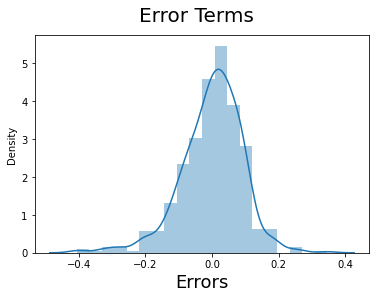

In [780]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

Text(0.5, 1.0, 'Residual plot')

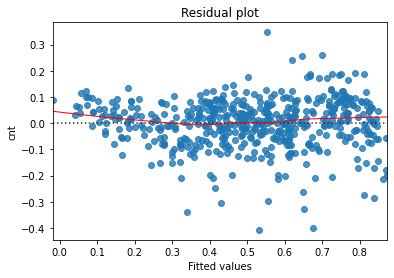

In [781]:
# Plot the scatter plot to identify the error terms
fig = plt.figure()
sns.residplot(y_train_pred,y_train, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')  

Text(0.5, 1.0, 'Normal Q-Q Plot')

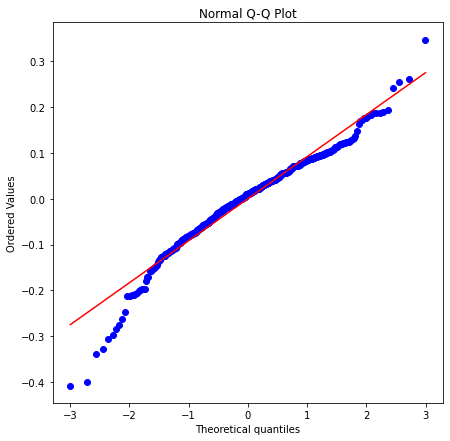

In [782]:
# Plotting Q-Q plot to confirm normal distribution of errors
plt.figure(figsize=(7,7))
stats.probplot(res, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

Text(0.5, 0, 'Fitted value')

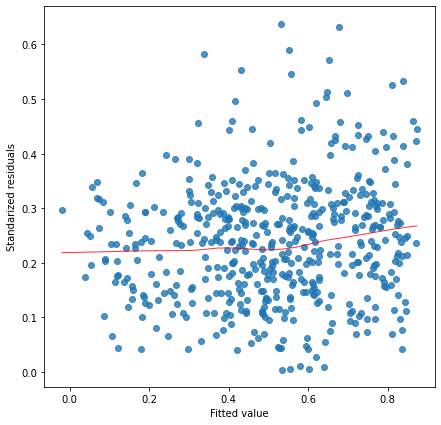

In [783]:
# Verify the homoscedasticity of residuals
norm_residuals_abs_sqrt=np.sqrt(np.abs(res))

plt.figure(figsize=(7,7))
sns.regplot(y_train_pred, norm_residuals_abs_sqrt,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")

In [784]:
# Claculating mean of Residuals
round((res).mean(),2)

-0.0

- ##### Observations:
1. The error graphs are normally distributed.
2. The residual is not showing any covariance.
3. Residucals are homoscedasticity.
4. Residucals mean is zero.

- ###### Now we can say modeal is ready for prediction

### Step 5: Prediction & Evaluation on the Test set


- #### Model Prediction

In [785]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = [ 'temp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,yr,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Apr,...,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light Weather,weathersit_Misty Weather
184,0,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
535,1,1,0.901354,0.610133,0.153728,0.712034,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
299,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
221,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
152,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [786]:
df_test.describe()

,yr,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Apr,...,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light Weather,weathersit_Misty Weather
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.091324,...,0.164384,0.146119,0.178082,0.118721,0.100457,0.127854,0.164384,0.652968,0.027397,0.319635
std,0.500722,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.288730,...,0.371472,0.354034,0.383458,0.324202,0.301297,0.334692,0.371472,0.477117,0.163612,0.467403
min,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [787]:
y_test = df_test.pop('cnt')
X_test = df_test

In [788]:
# add constants
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Apr,...,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light Weather,weathersit_Misty Weather
184,1.0,0,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
535,1.0,1,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
299,1.0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
221,1.0,0,1,0.881625,0.437098,0.339570,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
152,1.0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [789]:
#drop variables which does not exist in X_train
X_test_sm = X_test_sm[X_train_lm.columns]
X_test_sm.head()

,const,yr,temp,windspeed,season_spring,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Sun,weathersit_Light Weather,weathersit_Misty Weather
184,1.0,0,0.831783,0.084219,0,0,1,0,0,0,1
535,1.0,1,0.901354,0.153728,0,0,0,0,0,0,0
299,1.0,0,0.511964,0.334206,0,0,0,0,0,0,1
221,1.0,0,0.881625,0.339570,0,0,0,0,0,0,0
152,1.0,0,0.817246,0.537414,0,0,0,0,0,0,0


In [790]:
# y_predict
y_test_pred = lr.predict(X_test_sm)

- #### Model Evaluation

In [794]:
#evaluate the model
r2_train = r2_score(y_true=y_train, y_pred = y_train_pred)
r2_test = r2_score(y_true=y_test, y_pred = y_test_pred)
print("training data r-squared: ", r2_train)
print("test data r-squared: ", r2_test)

training data r-squared:  0.8280420447015808
test data r-squared:  0.7978418337355409


- #### Validating Assumptions of Linear Regression.

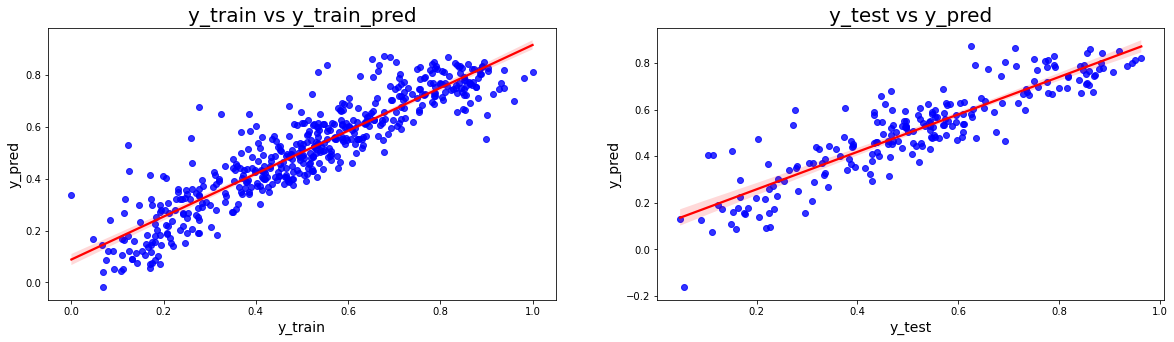

In [792]:
# 1) The predicted values have linear relationship with the actual values.
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.regplot( y_train, y_train_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_train vs y_train_pred', fontsize=20)              
plt.xlabel('y_train', fontsize=14)  
plt.ylabel('y_pred', fontsize=14) 

plt.subplot(1,2,2)
sns.regplot( y_test, y_test_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test', fontsize=14)   
plt.ylabel('y_pred', fontsize=14) 

plt.show()

- ##### Observations:
- The predicted values have linear relationship with the actual values.    
- The error graphs are normally distributed.
- The residual is not showing any covariance.
- Residucals are homoscedasticity.
- Residucals mean is zero.

### Step 6. Conclusion

In [793]:
#The final model selected is as below
print(lr.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     240.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.37e-183
Time:                        11:26:51   Log-Likelihood:                 487.44
No. Observations:                 510   AIC:                            -952.9
Df Residuals:                     499   BIC:                            -906.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

- As per above pair plot we can see the relation among temp, atemp, hum, windspeed, cnt. Hence, we can go for prediction using linear regression model.
- We can see, Linear trends relation is showing among independent categorical variables and target variable cnt.
- The model's p-value < 0.05 and ViF < 5 are in acceptable range. We can say out model follow linear regression rules. 
- We got the error normalized.
- The predicted values have linear relationship with the actual values.
- The error graphs are normally distributed.
- The residual is not showing any covariance.
- Residucals are homoscedasticity.
- Residucals mean is zero.
- Based on our analysis we can say Bike Rental service positively dependent on Year, Temprature, Spring season, September Month and Weekend.
- Negatively dependent on Windspeed, ist Cloudy and Snow Rainy weather and July month.
- We can get the final count using :
- ###### count/cnt:  0.2369 * yr + 0.3800 * temp - 0.164 * windspeed - 0.1308 * season_spring -0.0517 * mnth_Jan  -0.0691 * mnth_Jul  + 0.0541 * mnth_Sep + 0.0232 * weekday_Sun -0.2780 * weathersit_Light Weather - 0.0793 * weathersit_Misty Weather